<a href="https://colab.research.google.com/github/bsstttrrrr/fyp-multiclass-hatespeech-detection-DL/blob/main/DistilBERT_CNN_BiLSTM_HateSpeechClassifier_Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers



In [2]:
!pip install -q keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 6.0 MB/s eta 0:00:00


In [3]:
import pipeline
import pandas as pd

In [4]:
df=pd.read_csv('processed_tweets.csv')

In [5]:
all_results = {}


==================== DistilBERT-CNN-BiLSTM ====================


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the mode

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_ids           │ (None, 52)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_mask      │ (None, 52)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ tf_distil_bert_lay… │ (None, 52, 768)   │          0 │ input_ids[0][0],  │
│ (TFDistilBertLayer) │                   │            │ attention_mask[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 52, 64)    │    147,520 │ tf_distil_bert_l… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 52, 64)    │    245,824 │ tf_distil_bert_l… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 52, 64)    │    344,128 │ tf_distil_bert_l… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 64)        │          0 │ conv1d[0][0]      │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 64)        │          0 │ conv1d_1[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 64)        │          0 │ conv1d_2[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 192)       │          0 │ global_max_pooli… │
│ (Concatenate)       │                   │            │ global_max_pooli… │
│                     │                   │            │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 128)       │    426,496 │ tf_distil_bert_l… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 320)       │          0 │ concatenate_1[0]… │
│ (Concatenate)       │                   │            │ bidirectional[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │     82,176 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     32,896 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 3)         │        387 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,279,427 (4.88 MB)

 Trainable params: 1,279,427 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


Epoch 1/30
930/930 ━━━━━━━━━━━━━━━━━━━━ 61s 54ms/step - accuracy: 0.7692 - loss: 0.6233 - val_accuracy: 0.8483 - val_loss: 0.4154
Epoch 2/30
930/930 ━━━━━━━━━━━━━━━━━━━━ 78s 53ms/step - accuracy: 0.8520 - loss: 0.4196 - val_accuracy: 0.8634 - val_loss: 0.3598
Epoch 3/30
930/930 ━━━━━━━━━━━━━━━━━━━━ 92s 64ms/step - accuracy: 0.8694 - loss: 0.3625 - val_accuracy: 0.8701 - val_loss: 0.3508
Epoch 4/30
930/930 ━━━━━━━━━━━━━━━━━━━━ 83s 64ms/step - accuracy: 0.8803 - loss: 0.3391 - val_accuracy: 0.8794 - val_loss: 0.3278
Epoch 5/30
930/930 ━━━━━━━━━━━━━━━━━━━━ 81s 64ms/step - accuracy: 0.8893 - loss: 0.3111 - val_accuracy: 0.8822 - val_loss: 0.3207
Epoch 6/30
930/930 ━━━━━━━━━━━━━━━━━━━━ 73s 54ms/step - accuracy: 0.8912 - loss: 0.3020 - val_accuracy: 0.8830 - val_loss: 0.3174
Epoch 7/30
930/930 ━━━━━━━━━━━━━━━━━━━━ 81s 54ms/step - accuracy: 0.9000 - loss: 0.2829 - val_accuracy: 0.8858 - val_loss: 0.3150
Epoch 8/30
930/930 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - accuracy: 0.9068 - loss: 0.2624 - 

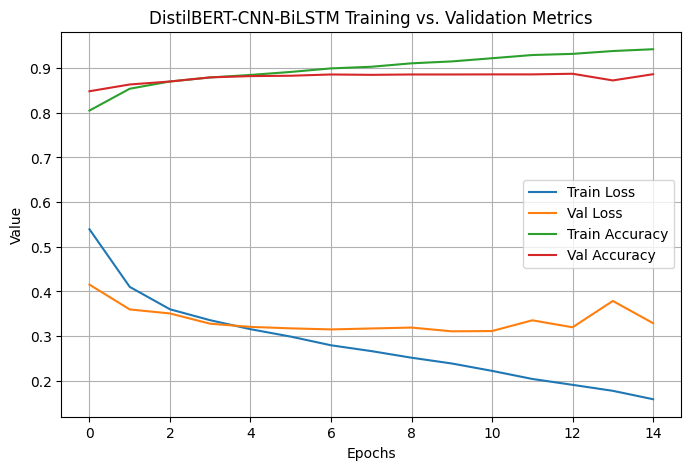

Input IDs shape: (4957, 52)
Attention Mask shape: (4957, 52)

DistilBERT-CNN-BiLSTM Evaluation:
Test Loss: 0.3132
Test Accuracy: 0.8832

Classification Report:
              precision    recall  f1-score   support

           0     0.5000    0.2797    0.3587       286
           1     0.9318    0.9325    0.9322      3839
           2     0.7518    0.8630    0.8036       832

    accuracy                         0.8832      4957
   macro avg     0.7279    0.6917    0.6982      4957
weighted avg     0.8767    0.8832    0.8775      4957

Cohen's Kappa Score: 0.6805

Confusion Matrix:
[[  80  158   48]
 [  70 3580  189]
 [  10  104  718]]


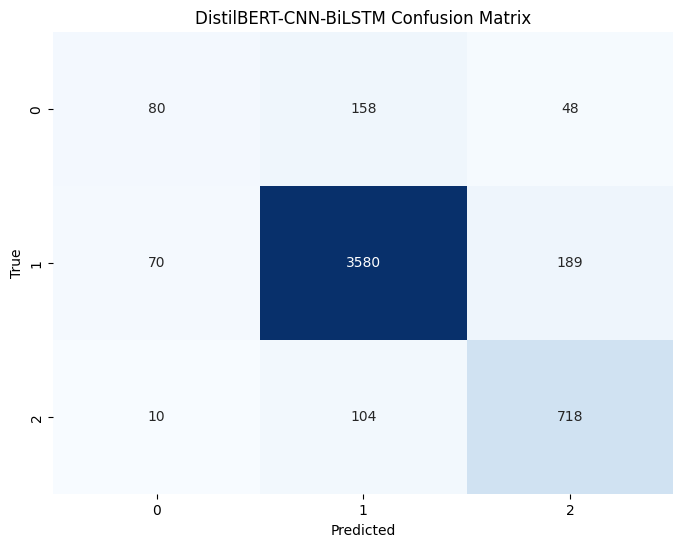

DistilBERT-CNN-BiLSTM Testing AUC (macro): 0.9260


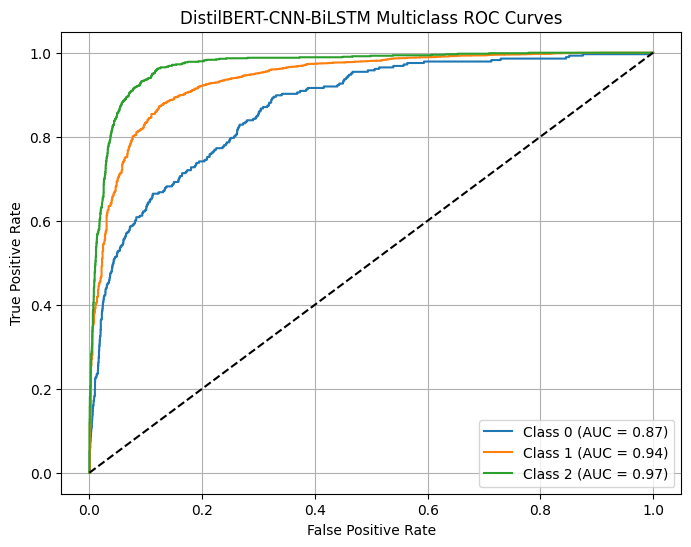

In [7]:
# Exp 1: Baseline
all_results["Experiment 1"] = pipeline.run_experiment(df,
    exp_name="DistilBERT-CNN-BiLSTM",
    get_data_fn=pipeline.get_train_test_data
)

In [15]:

import numpy as np

def to_serializable(obj):
    if isinstance(obj, np.ndarray):
        return obj.tolist()
    if isinstance(obj, (np.int64, np.int32)):
        return int(obj)
    if isinstance(obj, (np.float64, np.float32)):
        return float(obj)
    raise TypeError(f"Type {type(obj)} not serializable")

with open("experiment_1_results.json", "w") as f:
    json.dump(all_results, f, default=to_serializable)

In [6]:
import json
with open("experiment_1_results.json", "r") as f:
    all_results = json.load(f)

print(all_results["Experiment 1"])

{'results': {'loss': 0.3132028579711914, 'accuracy': 0.8831954598426819, 'classification_report': '              precision    recall  f1-score   support\n\n           0     0.5000    0.2797    0.3587       286\n           1     0.9318    0.9325    0.9322      3839\n           2     0.7518    0.8630    0.8036       832\n\n    accuracy                         0.8832      4957\n   macro avg     0.7279    0.6917    0.6982      4957\nweighted avg     0.8767    0.8832    0.8775      4957\n', 'kappa_score': 0.6804638251827999, 'confusion_matrix': [[80, 158, 48], [70, 3580, 189], [10, 104, 718]]}, 'auc_score': 0.9259821504101008}



==================== DistilBERT-CNN-BiLSTM, Resampled ====================


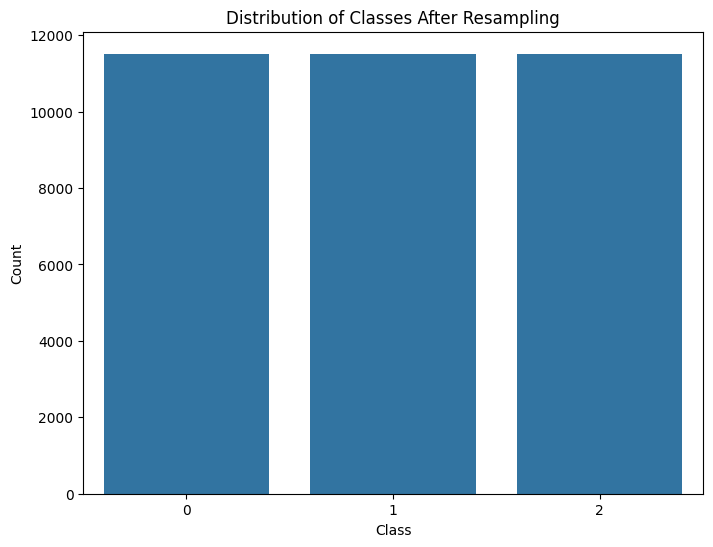

class
1    11513
0    11513
2    11513
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_transform.bias', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the mode

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_ids           │ (None, 52)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_mask      │ (None, 52)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ tf_distil_bert_lay… │ (None, 52, 768)   │          0 │ input_ids[0][0],  │
│ (TFDistilBertLayer) │                   │            │ attention_mask[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 52, 64)    │    147,520 │ tf_distil_bert_l… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 52, 64)    │    245,824 │ tf_distil_bert_l… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 52, 64)    │    344,128 │ tf_distil_bert_l… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 64)        │          0 │ conv1d[0][0]      │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 64)        │          0 │ conv1d_1[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 64)        │          0 │ conv1d_2[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 192)       │          0 │ global_max_pooli… │
│ (Concatenate)       │                   │            │ global_max_pooli… │
│                     │                   │            │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 128)       │    426,496 │ tf_distil_bert_l… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 320)       │          0 │ concatenate_1[0]… │
│ (Concatenate)       │                   │            │ bidirectional[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │     82,176 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     32,896 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 3)         │        387 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,279,427 (4.88 MB)

 Trainable params: 1,279,427 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


Epoch 1/30
2159/2159 ━━━━━━━━━━━━━━━━━━━━ 125s 52ms/step - accuracy: 0.5984 - loss: 0.8556 - val_accuracy: 0.7309 - val_loss: 0.6492
Epoch 2/30
2159/2159 ━━━━━━━━━━━━━━━━━━━━ 138s 52ms/step - accuracy: 0.8067 - loss: 0.4965 - val_accuracy: 0.8065 - val_loss: 0.5112
Epoch 3/30
2159/2159 ━━━━━━━━━━━━━━━━━━━━ 143s 52ms/step - accuracy: 0.8734 - loss: 0.3569 - val_accuracy: 0.8285 - val_loss: 0.4608
Epoch 4/30
2159/2159 ━━━━━━━━━━━━━━━━━━━━ 114s 53ms/step - accuracy: 0.9221 - loss: 0.2444 - val_accuracy: 0.8166 - val_loss: 0.5007
Epoch 5/30
2159/2159 ━━━━━━━━━━━━━━━━━━━━ 142s 53ms/step - accuracy: 0.9454 - loss: 0.1783 - val_accuracy: 0.8626 - val_loss: 0.4249
Epoch 6/30
2159/2159 ━━━━━━━━━━━━━━━━━━━━ 132s 48ms/step - accuracy: 0.9622 - loss: 0.1296 - val_accuracy: 0.8749 - val_loss: 0.4217
Epoch 7/30
2159/2159 ━━━━━━━━━━━━━━━━━━━━ 152s 53ms/step - accuracy: 0.9706 - loss: 0.1002 - val_accuracy: 0.8773 - val_loss: 0.4154
Epoch 8/30
2159/2159 ━━━━━━━━━━━━━━━━━━━━ 141s 52ms/step - accuracy: 

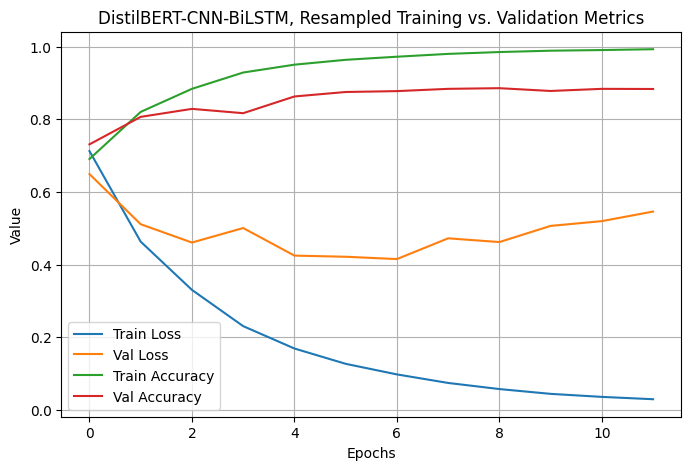

Input IDs shape: (4957, 52)
Attention Mask shape: (4957, 52)

DistilBERT-CNN-BiLSTM, Resampled Evaluation:
Test Loss: 0.4327
Test Accuracy: 0.8751

Classification Report:
              precision    recall  f1-score   support

           0     0.3883    0.3951    0.3917       286
           1     0.9361    0.9156    0.9257      3839
           2     0.7794    0.8534    0.8147       832

    accuracy                         0.8751      4957
   macro avg     0.7013    0.7214    0.7107      4957
weighted avg     0.8782    0.8751    0.8763      4957

Cohen's Kappa Score: 0.6706

Confusion Matrix:
[[ 113  133   40]
 [ 163 3515  161]
 [  15  107  710]]


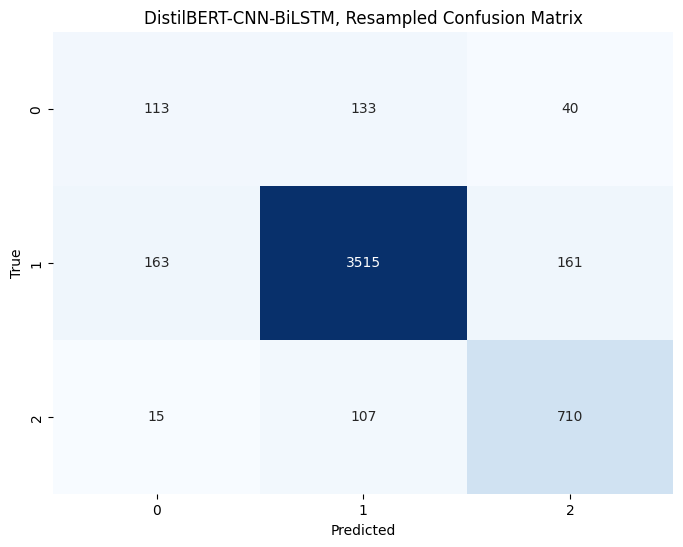

DistilBERT-CNN-BiLSTM, Resampled Testing AUC (macro): 0.9148


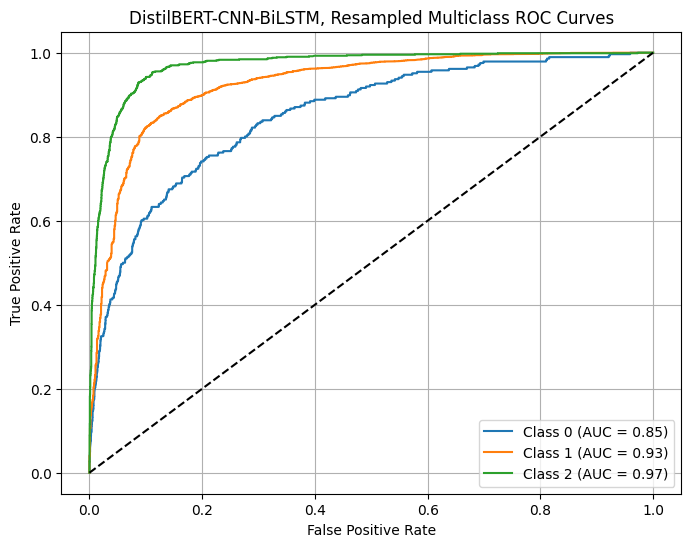

In [7]:
# Exp 2: Resampled
all_results["Experiment 2"] = pipeline.run_experiment(df,
    exp_name="DistilBERT-CNN-BiLSTM, Resampled",
    get_data_fn=pipeline.get_train_test_data,
    resample=True
)


==================== DistilBERT-CNN-BiLSTM, with Class Weights ====================
Class Weights: {0: np.float64(5.776612276612276), 1: np.float64(0.43049885636526825), 2: np.float64(1.9841206298372032)}


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_transform.bias', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_ids           │ (None, 52)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_mask      │ (None, 52)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ tf_distil_bert_lay… │ (None, 52, 768)   │          0 │ input_ids[0][0],  │
│ (TFDistilBertLayer) │                   │            │ attention_mask[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 52, 64)    │    147,520 │ tf_distil_bert_l… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 52, 64)    │    245,824 │ tf_distil_bert_l… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 52, 64)    │    344,128 │ tf_distil_bert_l… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 64)        │          0 │ conv1d[0][0]      │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 64)        │          0 │ conv1d_1[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 64)        │          0 │ conv1d_2[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 192)       │          0 │ global_max_pooli… │
│ (Concatenate)       │                   │            │ global_max_pooli… │
│                     │                   │            │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 128)       │    426,496 │ tf_distil_bert_l… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 320)       │          0 │ concatenate_1[0]… │
│ (Concatenate)       │                   │            │ bidirectional[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │     82,176 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     32,896 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 3)         │        387 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,279,427 (4.88 MB)

 Trainable params: 1,279,427 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
930/930 ━━━━━━━━━━━━━━━━━━━━ 60s 56ms/step - accuracy: 0.4873 - loss: 1.0394 - val_accuracy: 0.6968 - val_loss: 0.7869
Epoch 2/30
930/930 ━━━━━━━━━━━━━━━━━━━━ 90s 65ms/step - accuracy: 0.6832 - loss: 0.7625 - val_accuracy: 0.7244 - val_loss: 0.6804
Epoch 3/30
930/930 ━━━━━━━━━━━━━━━━━━━━ 81s 64ms/step - accuracy: 0.7348 - loss: 0.6534 - val_accuracy: 0.7613 - val_loss: 0.6154
Epoch 4/30
930/930 ━━━━━━━━━━━━━━━━━━━━ 72s 54ms/step - accuracy: 0.7500 - loss: 0.5933 - val_accuracy: 0.7686 - val_loss: 0.5829
Epoch 5/30
930/930 ━━━━━━━━━━━━━━━━━━━━ 49s 53ms/step - accuracy: 0.7670 - loss: 0.5533 - val_accuracy: 0.7664 - val_loss: 0.5893
Epoch 6/30
930/930 ━━━━━━━━━━━━━━━━━━━━ 92s 64ms/step - accuracy: 0.7780 - loss: 0.5209 - val_accuracy: 0.7706 - val_loss: 0.5769
Epoch 7/30
930/930 ━━━━━━━━━━━━━━━━━━━━ 82s 64ms/step - accuracy: 0.7864 - loss: 0.4825 - val_accuracy: 0.7835 - val_loss: 0.5543
Epoch 8/30
930/930 ━━━━━━━━━━━━━━━━━━━━ 82s 64ms/step - accuracy: 0.8019 - loss: 0.4538 - 

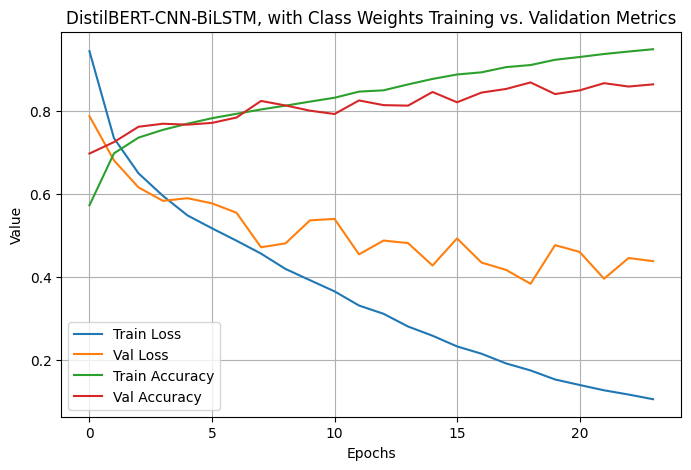

Input IDs shape: (4957, 52)
Attention Mask shape: (4957, 52)

DistilBERT-CNN-BiLSTM, with Class Weights Evaluation:
Test Loss: 0.4029
Test Accuracy: 0.8648

Classification Report:
              precision    recall  f1-score   support

           0     0.3610    0.4720    0.4091       286
           1     0.9404    0.9002    0.9199      3839
           2     0.7665    0.8365    0.8000       832

    accuracy                         0.8648      4957
   macro avg     0.6893    0.7363    0.7097      4957
weighted avg     0.8778    0.8648    0.8703      4957

Cohen's Kappa Score: 0.6541

Confusion Matrix:
[[ 135  107   44]
 [ 215 3456  168]
 [  24  112  696]]


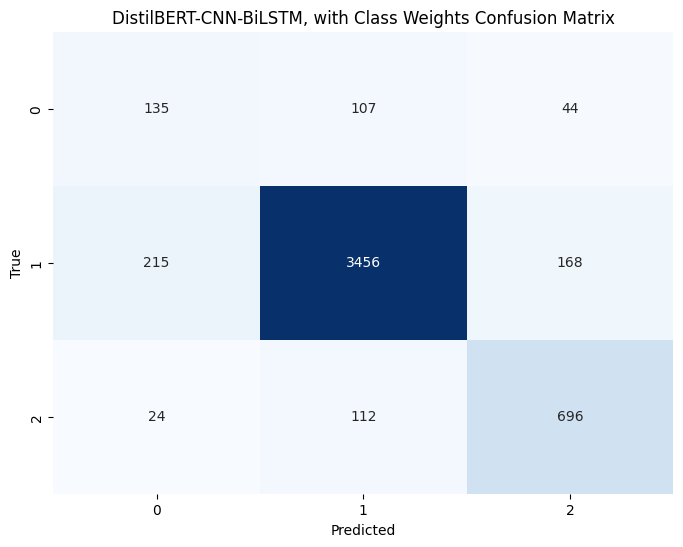

DistilBERT-CNN-BiLSTM, with Class Weights Testing AUC (macro): 0.9197


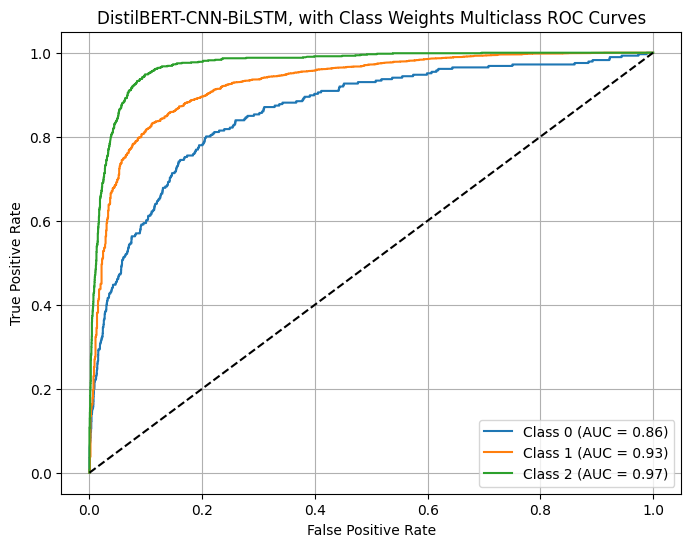

In [8]:
# Exp 3: Class Weights
all_results["Experiment 3"] = pipeline.run_experiment(df,
    exp_name="DistilBERT-CNN-BiLSTM, with Class Weights",
    get_data_fn=pipeline.get_train_test_data,
    use_class_weights=True
)


==================== DistilBERT-CNN-BiLSTM, Resampled + Class Weights ====================


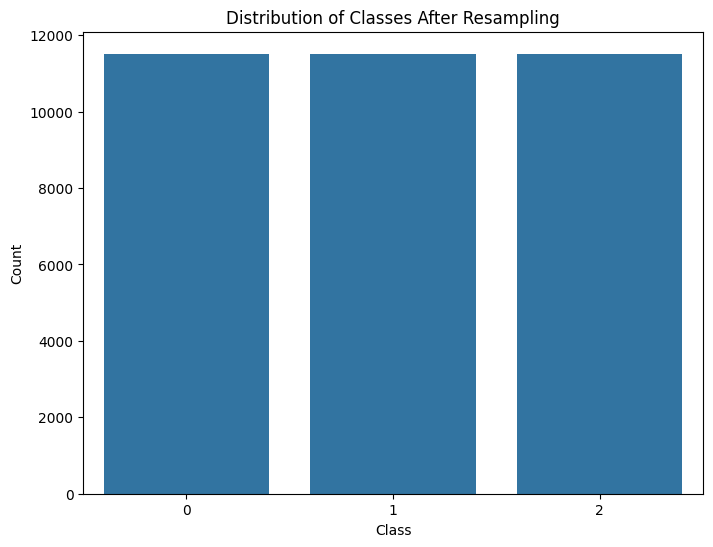

class
1    11513
0    11513
2    11513
Name: count, dtype: int64
Class Weights: {0: np.float64(1.0), 1: np.float64(1.0), 2: np.float64(1.0)}


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_transform.bias', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_ids           │ (None, 52)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_mask      │ (None, 52)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ tf_distil_bert_lay… │ (None, 52, 768)   │          0 │ input_ids[0][0],  │
│ (TFDistilBertLayer) │                   │            │ attention_mask[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 52, 64)    │    147,520 │ tf_distil_bert_l… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 52, 64)    │    245,824 │ tf_distil_bert_l… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 52, 64)    │    344,128 │ tf_distil_bert_l… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 64)        │          0 │ conv1d[0][0]      │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 64)        │          0 │ conv1d_1[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 64)        │          0 │ conv1d_2[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 192)       │          0 │ global_max_pooli… │
│ (Concatenate)       │                   │            │ global_max_pooli… │
│                     │                   │            │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 128)       │    426,496 │ tf_distil_bert_l… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 320)       │          0 │ concatenate_1[0]… │
│ (Concatenate)       │                   │            │ bidirectional[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │     82,176 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     32,896 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 3)         │        387 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,279,427 (4.88 MB)

 Trainable params: 1,279,427 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
2159/2159 ━━━━━━━━━━━━━━━━━━━━ 111s 48ms/step - accuracy: 0.5917 - loss: 0.8597 - val_accuracy: 0.7757 - val_loss: 0.5685
Epoch 2/30
2159/2159 ━━━━━━━━━━━━━━━━━━━━ 102s 47ms/step - accuracy: 0.7968 - loss: 0.5116 - val_accuracy: 0.7533 - val_loss: 0.6239
Epoch 3/30
2159/2159 ━━━━━━━━━━━━━━━━━━━━ 150s 51ms/step - accuracy: 0.8695 - loss: 0.3634 - val_accuracy: 0.8207 - val_loss: 0.4573
Epoch 4/30
2159/2159 ━━━━━━━━━━━━━━━━━━━━ 143s 52ms/step - accuracy: 0.9209 - loss: 0.2489 - val_accuracy: 0.8416 - val_loss: 0.4385
Epoch 5/30
2159/2159 ━━━━━━━━━━━━━━━━━━━━ 141s 51ms/step - accuracy: 0.9457 - loss: 0.1830 - val_accuracy: 0.8465 - val_loss: 0.4453
Epoch 6/30
2159/2159 ━━━━━━━━━━━━━━━━━━━━ 142s 52ms/step - accuracy: 0.9618 - loss: 0.1353 - val_accuracy: 0.8832 - val_loss: 0.3964
Epoch 7/30
2159/2159 ━━━━━━━━━━━━━━━━━━━━ 142s 52ms/step - accuracy: 0.9728 - loss: 0.0953 - val_accuracy: 0.8721 - val_loss: 0.4083
Epoch 8/30
2159/2159 ━━━━━━━━━━━━━━━━━━━━ 141s 51ms/step - accuracy: 

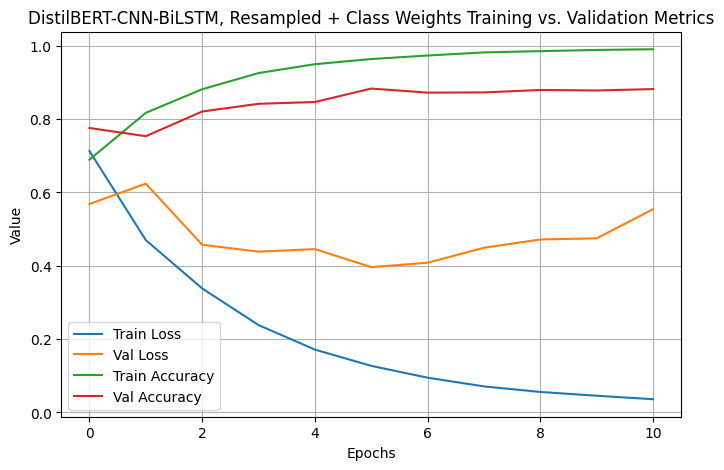

Input IDs shape: (4957, 52)
Attention Mask shape: (4957, 52)

DistilBERT-CNN-BiLSTM, Resampled + Class Weights Evaluation:
Test Loss: 0.4088
Test Accuracy: 0.8767

Classification Report:
              precision    recall  f1-score   support

           0     0.4269    0.3881    0.4066       286
           1     0.9312    0.9239    0.9276      3839
           2     0.7748    0.8269    0.8000       832

    accuracy                         0.8767      4957
   macro avg     0.7110    0.7130    0.7114      4957
weighted avg     0.8759    0.8767    0.8761      4957

Cohen's Kappa Score: 0.6685

Confusion Matrix:
[[ 111  132   43]
 [ 135 3547  157]
 [  14  130  688]]


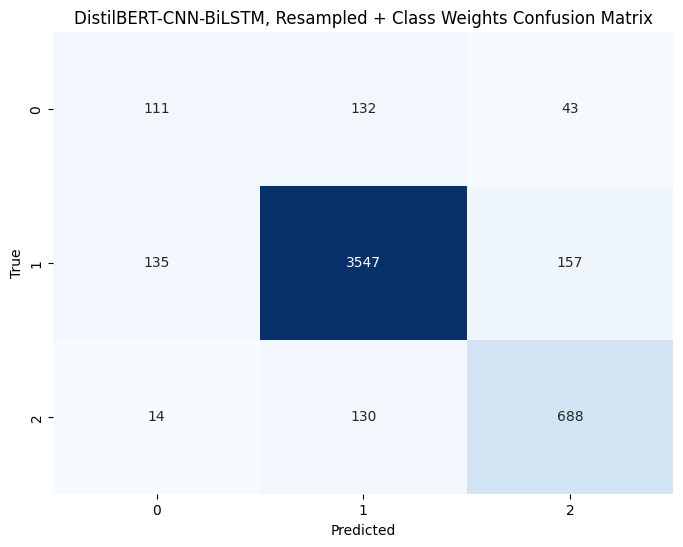

DistilBERT-CNN-BiLSTM, Resampled + Class Weights Testing AUC (macro): 0.9159


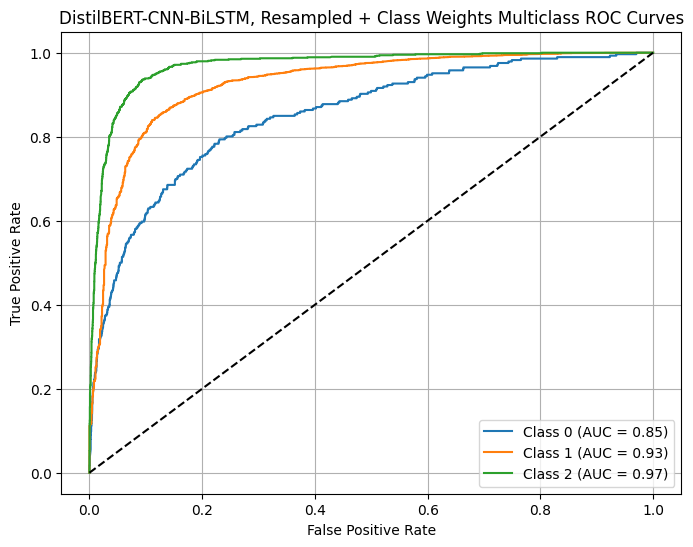

In [9]:
# Exp 4: Resample + Class Weights
all_results["Experiment 4"] = pipeline.run_experiment(df,
    exp_name="DistilBERT-CNN-BiLSTM, Resampled + Class Weights",
    get_data_fn=pipeline.get_train_test_data,
    resample=True,
    use_class_weights=True
)


==================== DistilBERT-CNN-BiLSTM, Ablation Study ====================


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_transform.bias', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_ids           │ (None, 52)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_mask      │ (None, 52)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ tf_distil_bert_lay… │ (None, 52, 768)   │          0 │ input_ids[0][0],  │
│ (TFDistilBertLayer) │                   │            │ attention_mask[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 52, 64)    │    147,520 │ tf_distil_bert_l… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 52, 64)    │    245,824 │ tf_distil_bert_l… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 52, 64)    │    344,128 │ tf_distil_bert_l… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 64)        │          0 │ conv1d[0][0]      │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 64)        │          0 │ conv1d_1[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 64)        │          0 │ conv1d_2[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 192)       │          0 │ global_max_pooli… │
│ (Concatenate)       │                   │            │ global_max_pooli… │
│                     │                   │            │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 128)       │    426,496 │ tf_distil_bert_l… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 320)       │          0 │ concatenate_1[0]… │
│ (Concatenate)       │                   │            │ bidirectional[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │     82,176 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     32,896 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 3)         │        387 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,279,427 (4.88 MB)

 Trainable params: 1,279,427 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
930/930 ━━━━━━━━━━━━━━━━━━━━ 60s 56ms/step - accuracy: 0.7677 - loss: 0.6495 - val_accuracy: 0.8515 - val_loss: 0.4429
Epoch 2/30
930/930 ━━━━━━━━━━━━━━━━━━━━ 80s 54ms/step - accuracy: 0.8409 - loss: 0.4614 - val_accuracy: 0.8612 - val_loss: 0.3924
Epoch 3/30
930/930 ━━━━━━━━━━━━━━━━━━━━ 59s 64ms/step - accuracy: 0.8694 - loss: 0.3817 - val_accuracy: 0.8711 - val_loss: 0.3532
Epoch 4/30
930/930 ━━━━━━━━━━━━━━━━━━━━ 82s 64ms/step - accuracy: 0.8808 - loss: 0.3405 - val_accuracy: 0.8753 - val_loss: 0.3335
Epoch 5/30
930/930 ━━━━━━━━━━━━━━━━━━━━ 82s 64ms/step - accuracy: 0.8902 - loss: 0.3129 - val_accuracy: 0.8790 - val_loss: 0.3237
Epoch 6/30
930/930 ━━━━━━━━━━━━━━━━━━━━ 72s 53ms/step - accuracy: 0.8964 - loss: 0.2892 - val_accuracy: 0.8814 - val_loss: 0.3174
Epoch 7/30
930/930 ━━━━━━━━━━━━━━━━━━━━ 49s 53ms/step - accuracy: 0.9076 - loss: 0.2632 - val_accuracy: 0.8834 - val_loss: 0.3123
Epoch 8/30
930/930 ━━━━━━━━━━━━━━━━━━━━ 92s 64ms/step - accuracy: 0.9196 - loss: 0.2340 - 

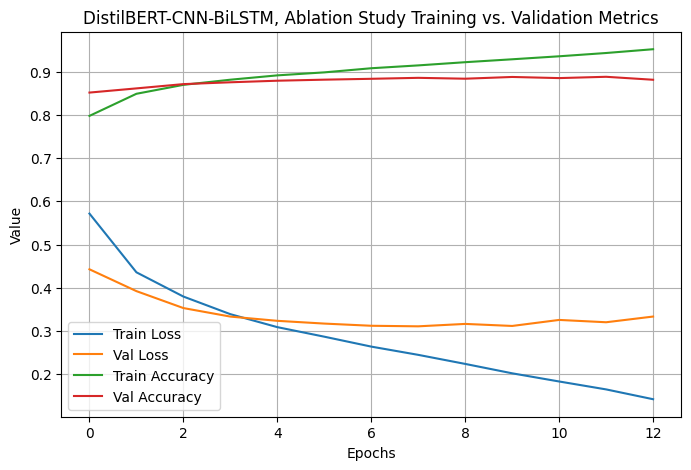

Input IDs shape: (4957, 52)
Attention Mask shape: (4957, 52)

DistilBERT-CNN-BiLSTM, Ablation Study Evaluation:
Test Loss: 0.3071
Test Accuracy: 0.8834

Classification Report:
              precision    recall  f1-score   support

           0     0.5000    0.2028    0.2886       286
           1     0.9153    0.9510    0.9328      3839
           2     0.7864    0.8053    0.7957       832

    accuracy                         0.8834      4957
   macro avg     0.7339    0.6530    0.6724      4957
weighted avg     0.8697    0.8834    0.8726      4957

Cohen's Kappa Score: 0.6636

Confusion Matrix:
[[  58  185   43]
 [  49 3651  139]
 [   9  153  670]]


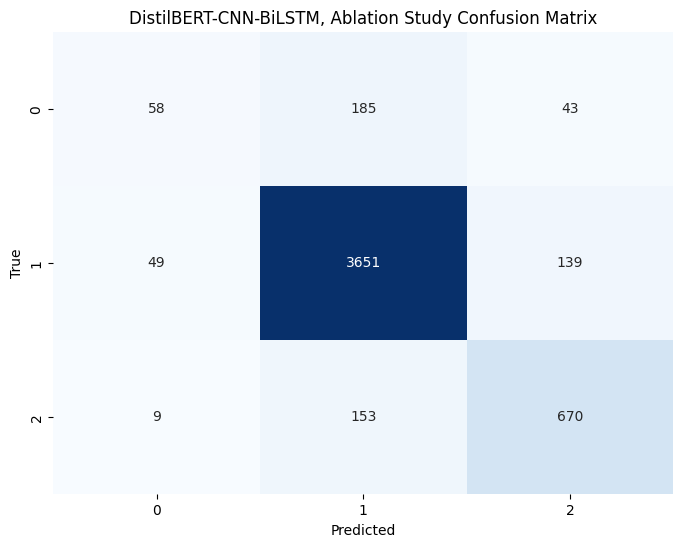

DistilBERT-CNN-BiLSTM, Ablation Study Testing AUC (macro): 0.9236


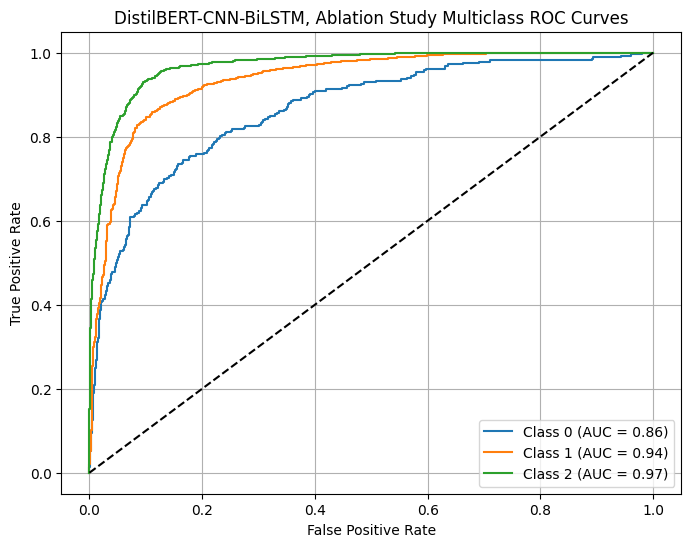

In [10]:
# Exp 5: Ablation Study (No preprocessing)
all_results["Experiment 5"] = pipeline.run_experiment(df,
    exp_name="DistilBERT-CNN-BiLSTM, Ablation Study",
    get_data_fn=pipeline.get_ablation_study_data
)

     Experiment  Accuracy Kappa       AUC
0  Experiment 1  0.883195  None  0.925982


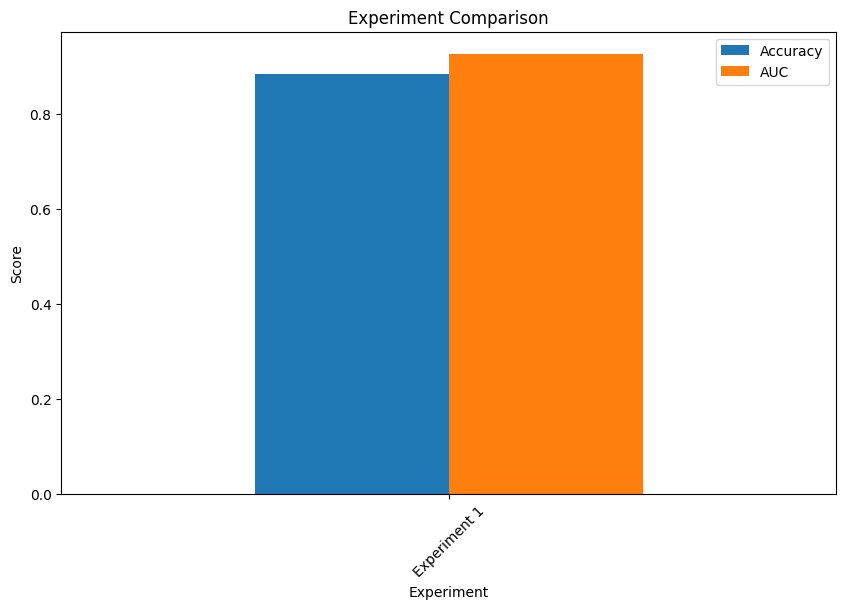

In [14]:
summary_df = pipeline.collect_results(all_results)
print(summary_df)

# Optional: visualize
import matplotlib.pyplot as plt

summary_df.set_index("Experiment")[["Accuracy", "Kappa", "AUC"]].plot(
    kind="bar", figsize=(10,6), rot=45
)
plt.title("Experiment Comparison")
plt.ylabel("Score")
plt.show()